# For train, validation data

In [27]:
import os

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
x_train = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/x_train_220819.csv', index_col = 0)

In [29]:
y_train = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/y_train_220819.csv',index_col=0)

# For test data

In [30]:
#scale까지 완료한 test data load
test_data_scale = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/testdata_220819.csv',index_col = 0)
test_data_scale

,Volume_total,sentiment_index_total,High,Low,Vol,RSI,SMA_5,SMA_20,SMA_60,EMA,MACD,signal,Stochastic RSI_fastk,Stochastic RSI_fastd,Stochastic Oscillator Index_slowk,Stochastic Oscillator Index_slowd,Fluctuations
0,0.545000,0.195338,0.959518,0.980993,0.002937,0.597561,0.991824,1.001365,1.009106,1.007050,0.436198,0.466803,0.972114,0.989451,0.858229,0.901095,0
1,0.585140,0.239189,0.971860,0.988536,0.003102,0.604627,1.003399,0.999281,1.018160,1.013699,0.445752,0.470496,1.000000,0.989451,0.803497,0.871422,1
2,0.537338,0.261605,0.965686,0.960906,0.002922,0.527532,1.001395,0.997352,1.025831,1.012624,0.427793,0.469277,0.000000,0.657371,0.519993,0.739452,0
3,0.498165,0.284602,0.943563,0.953181,0.002353,0.562177,0.999335,0.999615,1.033139,1.015618,0.424889,0.467627,0.449382,0.483127,0.404208,0.581804,1
4,0.521225,0.240861,0.956106,0.959773,0.002201,0.585381,1.000163,1.001591,1.040965,1.020763,0.429689,0.467423,0.750362,0.399915,0.371906,0.431945,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.604923,-0.000763,0.619732,0.561479,0.008440,0.385186,0.629822,0.711181,0.809156,0.674852,0.091733,0.163752,1.000000,0.632657,0.406729,0.215167,1
325,0.362027,0.097440,0.625358,0.626757,0.003665,0.426774,0.632902,0.709112,0.805078,0.674742,0.097517,0.147132,1.000000,0.763958,0.591088,0.384335,1
326,0.327240,0.149952,0.632318,0.637323,0.001580,0.422939,0.640462,0.706033,0.802081,0.674333,0.102285,0.134943,0.961115,0.987038,0.819918,0.613067,0
327,0.375777,0.093268,0.627981,0.609392,0.002794,0.367167,0.638447,0.700260,0.798961,0.669151,0.090336,0.122416,0.395550,0.785555,0.779561,0.742524,0


In [31]:
features = test_data_scale[['Volume_total','sentiment_index_total','High','Low','Vol',
                        'RSI','SMA_5','SMA_20','SMA_60','EMA','MACD','signal','Stochastic RSI_fastk',
                        'Stochastic RSI_fastd','Stochastic Oscillator Index_slowk','Stochastic Oscillator Index_slowd',]]
label= list(test_data_scale['Fluctuations'])

In [32]:
x_test = features
y_test = np.array(label)

# NB modeling

In [33]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

nb_grid = GridSearchCV(MultinomialNB() , param_grid=params, n_jobs=-1, cv=5, verbose=5)
nb_grid.fit(x_train, y_train)

print('Train Accuracy : %.3f'%nb_grid.best_estimator_.score(x_train, y_train))
print('Test Accuracy : %.3f'%nb_grid.best_estimator_.score(x_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%nb_grid.best_score_)
print('Best Parameters : ',nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.721
Test Accuracy : 0.581
Best Accuracy Through Grid Search : 0.717
Best Parameters :  {'alpha': 10.0}


C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
nb = nb_grid

In [35]:
nb_pred = nb.predict(x_test)

In [36]:
print("Test Accuracy: %f" % accuracy_score(y_test, nb_pred))

Test Accuracy: 0.580547


# Results Summary

Text(0.5, 257.44, 'Predicted label')

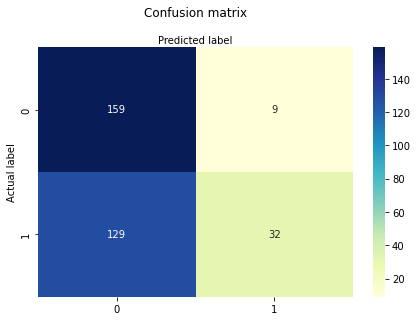

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, nb_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))
print("Precision:",metrics.precision_score(y_test, nb_pred))
print("Recall:",metrics.recall_score(y_test, nb_pred))
print("F1score:",metrics.f1_score(y_test, nb_pred))

Accuracy: 0.5805471124620061
Precision: 0.7804878048780488
Recall: 0.19875776397515527
F1score: 0.31683168316831684


In [44]:
import joblib #수정해야함

# 모델 저장
joblib.dump(nb_grid, 'C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/Bitcoin_result_revision/nb_bitcoin_sent.pkl')

# 모델 불러오기
nb_model = joblib.load('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/Bitcoin_result_revision/nb_bitcoin_sent.pkl')

In [45]:
nb_model

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = nb_model.predict(x_test)
predictions = [value for value in y_pred]

accuracy_score(y_test, predictions)

0.5805471124620061

In [47]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['class(0)', 'class(1)'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class(0),0.552083,0.946429,0.697368,168.000000
class(1),0.780488,0.198758,0.316832,161.000000
accuracy,0.580547,0.580547,0.580547,0.580547
macro avg,0.666286,0.572593,0.507100,329.000000
weighted avg,0.663856,0.580547,0.511148,329.000000


In [48]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률 추출
nb_pred_proba_class_1 = nb_model.predict_proba(x_test)[:,1]
nb_pred_proba_class_1

array([0.38964255, 0.39000779, 0.23077717, 0.29861264, 0.35093168,
       0.26506257, 0.2317897 , 0.32182027, 0.32803707, 0.32623548,
       0.32441185, 0.20386252, 0.20950307, 0.20876134, 0.21186666,
       0.24410449, 0.22446581, 0.2303373 , 0.23871246, 0.25721399,
       0.26170935, 0.42777991, 0.42666678, 0.42148218, 0.38710729,
       0.41590423, 0.4113639 , 0.35093434, 0.36421343, 0.23813819,
       0.36982569, 0.352624  , 0.4031974 , 0.40526622, 0.34150062,
       0.23130472, 0.27016974, 0.23640845, 0.24625217, 0.26883668,
       0.26819762, 0.27278667, 0.28021419, 0.29320883, 0.28334205,
       0.47463357, 0.43640954, 0.4612706 , 0.40462546, 0.52174209,
       0.52276729, 0.53067319, 0.51424167, 0.34930616, 0.35164782,
       0.44447482, 0.55092201, 0.53217998, 0.55328223, 0.54192828,
       0.41411306, 0.34615347, 0.37227064, 0.35437938, 0.35949618,
       0.54352797, 0.51472699, 0.53889534, 0.46993254, 0.52549262,
       0.51598952, 0.49739338, 0.42709145, 0.31145   , 0.32058

In [49]:
fprs, tprs, thresholds = roc_curve(y_test, nb_pred_proba_class_1)

# 반환된 임곗값 배열에서 샘플로 데이터 추출
# thresholds[0]은 max(예측확률)+1 값이 임의로 지정됨.

thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index':thr_index,
             'FPR':fprs[thr_index],
             'TPR':tprs[thr_index]})

,index,FPR,TPR
0,1,0.000000,0.006211
1,2,0.000000,0.062112
2,3,0.005952,0.062112
3,4,0.005952,0.093168
4,5,0.011905,0.093168
...,...,...,...
138,139,0.922619,0.987578
139,140,0.922619,0.993789
140,141,0.928571,0.993789
141,142,0.928571,1.000000


In [50]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()

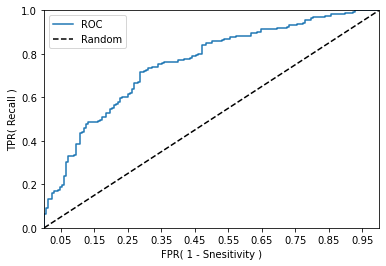

In [51]:
from sklearn.metrics import roc_curve

roc_curve_plot(y_test, nb_pred_proba_class_1)

In [52]:
from sklearn.metrics import roc_auc_score

pred_proba = nb_model.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Score: ', roc_score)

ROC AUC Score:  0.7554347826086956
